In [16]:
# 필요한 모듈 import

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [3]:
# 저장한 csv 파일 불러오기

df = pd.read_csv("./suggestion.csv")

In [4]:
# 데이터 정보 확인하기

pd.DataFrame.describe(df["vote"])

count     178.000000
mean       43.252809
std       218.805742
min         0.000000
25%         1.250000
50%         4.000000
75%         7.000000
max      2037.000000
Name: vote, dtype: float64

In [5]:
# 추천수가 높은 순서대로 데이터 읽고 인덱스 다시 부여

df = df.sort_values(["vote"], ascending=[False])
df.reset_index(drop=True)

,sgId,title,category,content,start,end,vote,author
0,64,난임지원확대 첫아이 횟수패지,보건복지,요즘 뉴스에 심심치않게 저출산 관련내용이많이나옵니다정부에선 많은 계획을말했지만 정작...,2018.10.02,2018.12.30,2037,엄마란소리
1,63,"난임 건강보험 지원, 임산부처럼 바우처로 제공해 주세요",보건복지,"현황)2017년 10월부터 법률혼 난임부부에게 인공수정 3회, 체외수정 신선 4회,...",2018.10.02,2018.12.30,1693,곰돌이네
2,65,보건소에서 난임시술 관련주사 맞게해주세요,보건복지,시험관을 하게되면 이식후 약2주간 프로게스테론 주사를 처방받게됩니다피검사후 임신수치...,2018.10.03,2018.12.31,1115,알지온
3,66,유전병인 희귀병 소뇌위축증 환우들을 도와주세요,보건복지,안녕하세요 저희 외갓집 어른들이 앓고 있는 소뇌위축증을알려드리려합니다.총 6남매중 ...,2018.10.05,2019.01.02,460,매덩이
4,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,2019.04.25,2019.07.23,407,딸기생크림
5,152,사회적경제 활성화를 위한 계약제도 개선 제안,일반행정,저는 서울특별시 사회적경제지원센터 공공구매영업지원단을 책임지고 있는 이철종입니다.사...,2019.02.24,2019.05.24,194,무한소
6,32,종이 당직일지 이제는 안녕!,일반행정,과제명 : 당직근무일지 전산화* 꼭 필요시 월별 출력 보관국가공무원 복무규칙 제25...,2018.09.04,2018.12.02,167,NaN
7,85,올바른 119신고의 중요성과 신고방법 교육 의무화,안전,안녕하세요!현재 시민안전파수꾼 청년 애드보케트라는 활동을 하면서 시민들의 초기대응능...,2018.10.22,2019.01.19,133,정미현
8,10,"불법 체류자, 외국인 근로자를 제한하고, 대한민국 국민의 일자리를 보호해 주십시오.",기타,<현재 불법 체류자. 외국인 근로자 급증이 사회적 문제로 떠오르고 있습니다.>현재 ...,2018.08.06,2018.09.05,132,대한민국만세
9,71,"인공지능 담당관(CoAIO, Chief of Artificial Intelligen...",일반행정,저는 1990년 후반에 정보화담당관(CIO) 제도 도입에 대한 의견을 제시하여 시행...,2018.10.10,2019.01.07,126,안전역량


In [6]:
# 날짜 자료형으로 변환

df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

In [8]:
# 마감되지 않은 제안만 확인하기

def what_is_now(dataset, today):
    dataset = dataset.loc[(dataset['end'] > today)]
    return dataset

today = datetime.datetime.now()
now_df = what_is_now(df, today)
now_df

,sgId,title,category,content,start,end,vote,author
48,165,공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.,인권/평등,1.근로자의 날(5월1일)은 세계적으로May-day로 기념하며 노동시간 기준을8시간...,2019-04-25,2019-07-23,407,딸기생크림
2,215,"중앙부처 및 산하기관에서 추진하는 공모사업, 지원 사업을 한곳에서 볼 수 있게 해 ...",국민참여,정부 각 부처에서는 훌륭한 공모사업이나 지원사업들을 많이 하고 있습니다.이런 내용을...,2019-06-24,2019-09-21,44,희동이
45,168,육군 ‘인권 관련 제도 개선,인권/평등,제 14조(군기순찰조 임무)1. 군기순찰조는 <군기순찰활동 지시> 제 3장 및 제 ...,2019-04-28,2019-07-26,30,"국방, 정책, 정치"
44,169,체당금 관련 법안에 관해서 건의드립니다.,보건복지,우선 저는 10년가까이 근무했던 회사에서 퇴사한 후 2년이 다되도록 체불임금 및 퇴...,2019-05-02,2019-07-30,13,꿀떵이맘
49,164,교육기관의 업무 개시일을 1월 1일로 변경하여야 합니다.,기타,교육기관의 업무 개시일을1월1일로 변경하여야 합니다.대부분의 사람들과 기관들은 매년...,2019-04-24,2019-07-22,12,goldman
31,182,가업상속제도 이대로 좋은가?,일반행정,"[ 가업상속제도 이대로 좋은가? ]''매출액 3,000억원 미만 기업에 적용하는 가...",2019-05-30,2019-08-27,10,hyusco
46,167,국가의 안보를 수호하는 군인은 돈벌이 수단이 아니다.,인권/평등,국가의 안보를 수호하는 군인은 돈벌이 수단이 아니다.현재 동두천 일대 PC방 요금인...,2019-04-28,2019-07-26,9,"국방, 정책, 정치"
42,171,예산으로 건립한 생활체육시설을 시민의 품으로.,공동체,배드민턴을 취미로 운동하고 있습니다.가까운 곳에 예산으로 건립된 배드민턴 체육관이 ...,2019-05-09,2019-08-06,8,다스레벤
52,161,어린이 보호구역의 단계별 확대,안전,(문제점)현제의 어린이 보호구역은 학교주변만을 보고하고 있으며 이곳에는 선생님 경찰...,2019-04-17,2019-07-15,7,디딤돌
51,162,도시재생 활성화와 서민주택마련 정책 전환,기타,1.﻿현황ㅇ 서울의 서민들이 거주하는 곳은 환경이 열악하고 ​주택이 노후화되어 도...,2019-04-22,2019-07-20,7,주택


In [9]:
# 마감되지 않은 제안 데이터 정보 확인하기

pd.DataFrame.describe(now_df["vote"])

count     54.000000
mean      11.518519
std       55.322294
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      407.000000
Name: vote, dtype: float64

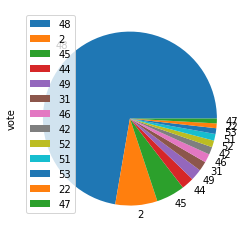

In [11]:
# 추천수가 5 이상인 제안의 전체 추천수 대비 추천 비율 확인하기

for_pie_df = now_df.loc[(df['vote'] >= 5)]
for_pie_df.plot.pie(y='vote')

In [12]:
# 추천수가 5 이상인 제안 제목 확인하기

print(for_pie_df['title'])

48        공무원도 근로자입니다. 5월 1일 근로자의 날 공무원도 쉴 수 있도록 해주십시오.
2     중앙부처 및 산하기관에서 추진하는 공모사업, 지원 사업을 한곳에서 볼 수 있게 해 ...
45                                      육군 ‘인권 관련 제도 개선
44                               체당금 관련 법안에 관해서 건의드립니다.
49                      교육기관의 업무 개시일을 1월 1일로 변경하여야 합니다.
31                                      가업상속제도 이대로 좋은가?
46                        국가의 안보를 수호하는 군인은 돈벌이 수단이 아니다.
42                            예산으로 건립한 생활체육시설을 시민의 품으로.
52                                     어린이 보호구역의 단계별 확대
51                               도시재생 활성화와 서민주택마련 정책 전환
53                                           공동육아 지원 사업
22                 사회적 가치 및 정부혁신 추진방향 공감 형성을 위한 교육영상 개발
47                       휠체어 이용하는 환자 장애인 택시 이용 가능하도록 개선
Name: title, dtype: object


In [13]:
# 관심이 필요한 제안 제목 확인하기

need_attention = now_df.loc[(df['vote'] < 5)]
print(need_attention['title'])

11                                    업체들의 어음 기간을 줄여주세요
6                     국민참여혁신제안 내용을  조회한 인원 수를  표기 해주세요.
43                       고속도로 등 다중 이용공간의 남여화장실을 가변형으로..
4                                         어린이집교사 근무환경개선
40                                      정부조직법 부처 개편 개정안
33                               공무집행중인 경찰의 힘 강력히해야 한다.
21                  원룸건축시 기본적인 방음설계를 의무화하고 철저히 검사하여야합니다
9                                        조부모 아이돌봄 수당 지급
38                          국회의원도 국민이 직접 소환할 수 있어야 합니다.
39                                             부당해고구제신청
41                         시니어들은 대한민국 국민이라고 말할 수 있는가???
50                                  청년 일자리 창출과 재능 활용 방안
36                                                사회 통합
8                                                빌딩 화장실
35                                        어린이집,유치원 CCTV
34                                    국공립 어린이집 많이 늘려주세요
24                         간병인비에 대한 국민건강보험공단 차원에서의 지원정책
23                               출산율 저하 대책을 어떻게 

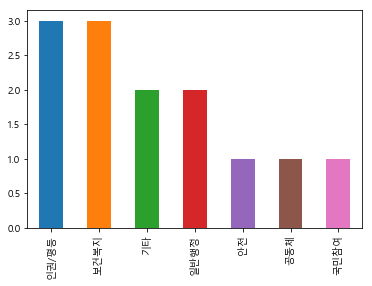

In [15]:
# 추천수가 5 이상인 제안의 카테고리 분포 확인하기

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

for_bar_plot = for_pie_df['category']
for_bar_plot

fig, ax = plt.subplots()
for_bar_plot.value_counts().plot(ax=ax, kind='bar')

In [17]:
# 명사 추출기 함수 정의

okt = Okt()

def okt_nouns(content):
    okt_content_nouns = okt.nouns(''.join(str(content.fillna(''))))
    return okt_content_nouns

In [18]:
# 글의 본문에서 명사들만 추출한 후(결과: 리스트) 문자열로 변환

on = okt_nouns(now_df['content'])
ons = ' '.join(on)

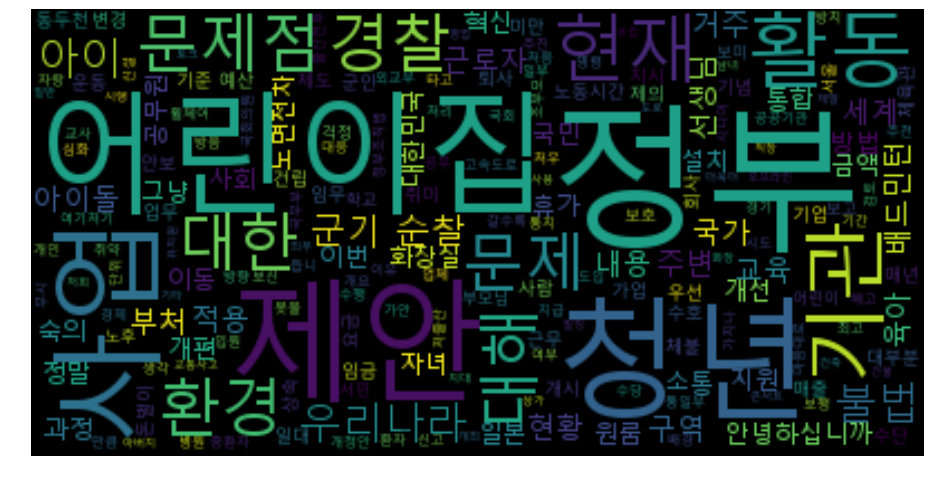

In [19]:
# 워드 클라우드로 표현하기

wc = WordCloud(max_font_size=70, font_path='c:/Windows/Fonts/malgun.ttf').generate(ons)
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()